# Dynamic plots with holoview

### Basic setup

In [1]:
# %matplotlib inline  
import numpy as np
from numpy import sqrt, log2, arctan2, sin, cos

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib import style
from matplotlib.animation import FuncAnimation as FA
from time import time

# from numba import jit

import IPython
from IPython.display import display, Markdown
import ipywidgets as widgets

import plotly.graph_objects as go
import plotly.express as px

from bokeh.plotting import figure, output_file, show

# plt.rcParams["figure.figsize"]=(20,20) #sets the default image size
# plt.rcParams["figure.dpi"]=(300)

In [2]:
# @jit (forceobj=True)
def Julia(cx, cy, center_x=0, center_y=0, frame_radius=2, max_iter=100, resolution=500):
    C = complex(cx, cy)
    R = (1 + sqrt(1 + 4*sqrt(cx*cx + cy*cy)))/2 #escape radius
    
    xmin = center_x - frame_radius
    xmax = center_x + frame_radius
    ymin = center_y - frame_radius
    ymax = center_y + frame_radius
    # NxN matrix populated with zeros
    z_arr = np.zeros([resolution,resolution], dtype=float, order='C')
    
    x = np.linspace(xmin, xmax, resolution)
    y = np.linspace(ymin, ymax, resolution)
   
    for _x in range(len(x)):
        for _y in range(len(y)):
            i = 0
            z = complex(x[_x],y[_y])
            while abs(z) < R and i < max_iter:
                z = z*z + C
                i +=1
                
            if abs(z) >= R:
                for j in range(2):
                    z = z*z + C
                    i +=1
                if abs(z) > 0:
                    i -= log2(log2(abs(z)))
            
            if i > 0:
                z_arr[_y,_x] = i
            else:
                z_arr[_y,_x] = 0
            
    return z_arr

# @jit
def Mandelbrot(center_x, center_y, frame_radius=2, max_iter=100, resolution=500 , escape_radius = 2):

    R = escape_radius

    xmin = center_x - frame_radius
    xmax = center_x + frame_radius
    ymin = center_y - frame_radius
    ymax = center_y + frame_radius
    # NxN matrix populated with zeros
    z_arr = np.zeros([resolution,resolution], dtype=float, order='C')
    
    x = np.linspace(xmin, xmax, resolution)
    y = np.linspace(ymin, ymax, resolution)

    
    for _x in range(len(x)):
        for _y in range(len(y)):
            i = 0
            z = complex(0,0)
            C = complex(x[_x],y[_y])
            while abs(z) <= R and i <= max_iter:
                z = z*z + C
                i +=1
                
            if abs(z) > R:
                for j in range(2):
                    z = z*z + C
                    i +=1

            z_arr[_y,_x] = i
            
    return z_arr

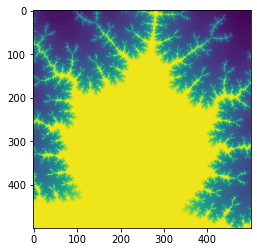

In [3]:
# Mandelbrot(center_x, center_y, frame_radius=2, max_iter=100, resolution=500 , escape_radius = 2):
# img0 = Mandelbrot(0,0,frame_radius=2, resolution = 200)
# img1 = Mandelbrot(-1.42, 0, frame_radius=.005, resolution = 500)
img1 = Mandelbrot(-0.11, -0.89, frame_radius=0.009, resolution = 500)

# plt.imshow(img0)
plt.imshow(img1)
plt.show()

### now we import holoviews 

In [4]:
import holoviews as hv
# hv.extension('bokeh') #uncomment

The dynamic images only work with hv.Image object, so we need to make a function that returns this.

In [5]:
#make a mandelbrot plotter
def Mandel_image(center_x, center_y, frame_radius=2, max_iter=100, resolution=100 , escape_radius = 2):
    return hv.Image(Mandelbrot(center_x,center_y,frame_radius, resolution))

Now we can make a bokeh image using holoveiws

In [6]:
#basic static image created through holoviews
# dmap = hv.DynamicMap(Mandel_image, kdims=['center_x', 'center_y', 'frame_radius', 'resolution']) #uncomment
# dmap[-0.2,0,1,25] #uncomment

To actually make it adjustable, we have to give it ranges. Then we are finished

In [7]:
#dynamic version of the mandelbrot
# mmap = hv.DynamicMap(Mandel_image, kdims=['center_x', 'center_y', 'frame_radius', 'resolution']) #uncomment
# mmap.redim.range(center_x =(-2.0, 1.0), center_y=(-1.0, 1.0), frame_radius=(0.01, 2), resolution=(25,300)).redim.default(center_x=-0.70,center_y=0,frame_radius=1.7) #uncomment

In [8]:
#def Julia(cx, cy, center_x=0, center_y=0, frame_radius=2, max_iter=100, resolution=500):
def Julia_image(center_x, center_y, frame_radius=2, cx=-0.79, cy=0.15, max_iter=100, resolution=100 , escape_radius = 2):
    return hv.Image(Julia(cx, cy, center_x, center_y, frame_radius, resolution))

In [9]:
# jmap = hv.DynamicMap(Julia_image, kdims=['center_x', 'center_y', 'frame_radius', 'resolution']) #uncomment
# jmap.redim.range(center_x =(-1.50, 1.50), center_y=(-1.5, 1.5), frame_radius=(0.01, 2), resolution=(25,300)).redim.default(center_x=0,center_y=0,frame_radius=2) #uncomment